In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv
# 读入数据
Dtree = open(r'AllElectronics.csv', 'r')
reader = csv.reader(Dtree)

# 获取第一行数据
headers = reader.__next__()
print(headers)

# 定义两个列表
featureList = []
labelList = []

#
for row in reader:
    # 把label存入list
    labelList.append(row[-1])#类别标签
    rowDict = {}
    for i in range(1, len(row)-1):
        #建立一个数据字典
        rowDict[headers[i]] = row[i]
    # 把数据字典存入list
    featureList.append(rowDict)

print(featureList)
# 把数据转换成01表示
vec = DictVectorizer()
x_data = vec.fit_transform(featureList).toarray()
print("x_data: " + str(x_data))

# 打印属性名称
print(vec.get_feature_names())

# 打印标签
print("labelList: " + str(labelList))

# 把标签转换成01表示
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print("y_data: " + str(y_data))
# 创建决策树模型
model = tree.DecisionTreeClassifier(criterion='entropy')##建立决策树模型,基于信息熵
# 输入数据建立模型
model.fit(x_data, y_data)
# 测试
x_test = x_data[0]
print("x_test: " + str(x_test))

predict = model.predict(x_test.reshape(1,-1))
print("predict: " + str(predict))
# 导出决策树
# pip install graphviz
# http://www.graphviz.org/
import graphviz

dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = vec.get_feature_names(),
                                class_names = lb.classes_,
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('computer')#生成一个决策树图表文件

['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']
[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_age

'computer.pdf'

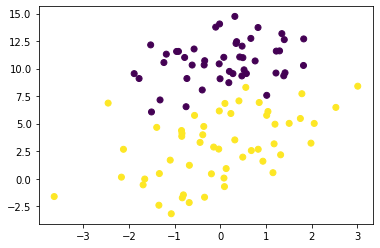

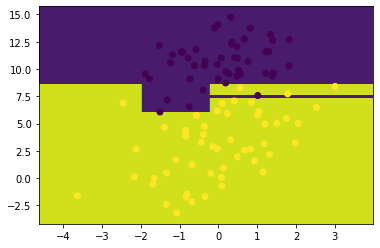

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()
# 创建决策树模型
model = tree.DecisionTreeClassifier()
# 输入数据建立模型
model.fit(x_data, y_data)
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
predictions = model.predict(x_data)
print(classification_report(predictions,y_data))

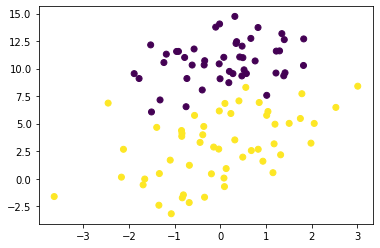

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
# 数据是否需要标准化
scale = False

# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

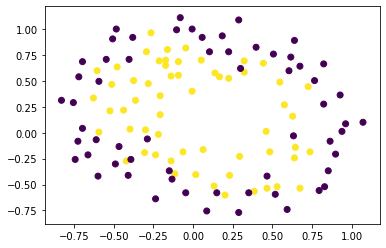

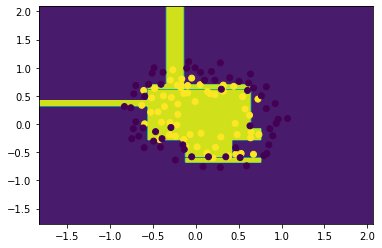

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        46
         1.0       0.93      1.00      0.97        42

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        17
         1.0       0.69      0.69      0.69        13

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:, :-1]
y_data = data[:, -1]

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
#分割数据
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

# 创建决策树模型
# max_depth，树的深度
# min_samples_split 内部节点再划分所需最小样本数
model = tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)
# 输入数据建立模型
model.fit(x_train, y_train)
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))

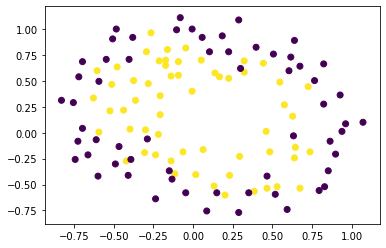

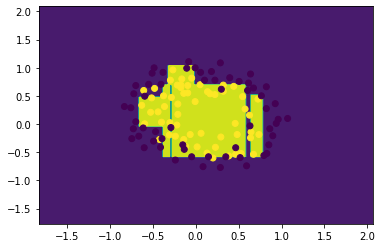

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        44
         1.0       0.95      0.95      0.95        44

    accuracy                           0.95        88
   macro avg       0.95      0.95      0.95        88
weighted avg       0.95      0.95      0.95        88

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77        15
         1.0       0.79      0.73      0.76        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:, :-1]
y_data = data[:, -1]

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
#分割数据
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

# 创建决策树模型
# max_depth，树的深度
# min_samples_split 内部节点再划分所需最小样本数
model = tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)
# 输入数据建立模型
model.fit(x_train, y_train)
# 导出决策树
import graphviz # http://www.graphviz.org/

dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = ['x','y'],
                                class_names = ['label0','label1'],
                                filled = True,
                                rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))